<a href="https://colab.research.google.com/github/Rafael-Abq/analise-dados-moveis-rj/blob/main/valores_imoveis_rj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados com valores de imóveis no Rio de Janeiro

  Como uma primeira experiência com análise de dados utilizando Pandas (e inspirado pelo, muito bem elaborado, [tutorial](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1) de introdução escrito por Vinícius Figueiredo), apresento este estudo sobre dados referentes a imóveis na cidade do Rio de Janeiro.

  Produzido por [Rafael Albuquerque](https://www.linkedin.com/in/rafael-albuquerque-de-oliveira/) em 28 de dezembro de 2020.   
  Revisado por [Bruna Machado Mulinari](https://www.linkedin.com/in/brunamachadomulinari/).

Neste estudo me concentrei em analisar:


*   A distribuição de imóveis por bairros;
*   A distribuição do valor de metro quadrado por bairro;
*   Os valores máximo, mínimo e médio dos preços dos imóveis;
*   Os valores máximo, mínimo e médio dos preços por metro quadrado;
*   Quais bairros possuem os valores mais altos de imóveis e por metro quadrado;
*   A relação entre os preços dos imóveis e as suas áreas;
*   A relação entre o valor de condomínio e a área dos imóveis.





# Informações do dataset:

- Importando a biblioteca Pandas:



In [1]:
import pandas as pd

- Importando a base de dados usando uma url:

In [2]:
dados_url = 'https://raw.githubusercontent.com/mvinoba/notebooks-for-binder/master/dados.csv'
dados_df = pd.read_csv(dados_url)

- Visualizando o tipo do dataset:

In [ ]:
type(dados_df)

pandas.core.frame.DataFrame

- VIsualizando os tipos de dados do dataframe:

In [ ]:
dados_df.dtypes

condominio      int64
quartos         int64
suites        float64
vagas         float64
area            int64
bairro         object
preco           int64
pm2           float64
dtype: object

- Visualizando o tamanho do dataframe:

In [ ]:
# (linhas, colunas)

dados_df.shape

(1997, 8)

- Visualizando as primeiras 10 linhas do dataframe:

In [ ]:
dados_df.head(10)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
5,917,1,1.0,1.0,60,Botafogo,630000,10500.00
6,850,1,1.0,1.0,65,Botafogo,740000,11384.62
7,350,1,1.0,1.0,43,Botafogo,570000,13255.81
8,440,1,1.0,1.0,26,Botafogo,430000,16538.46
9,510,1,1.0,1.0,42,Botafogo,500000,11904.76


- Visualizando as últimas 10 linhas do dataframe:

In [ ]:
dados_df.tail(10)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1987,880,3,1.0,1.0,100,Tijuca,800000,8000.00
1988,870,3,1.0,1.0,100,Tijuca,580000,5800.00
1989,400,3,1.0,1.0,92,Tijuca,480000,5217.39
1990,686,3,0.0,1.0,105,Tijuca,490000,4666.67
1991,450,3,1.0,1.0,72,Tijuca,435000,6041.67
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


- Visualizando o nome das colunas (features):

In [ ]:
dados_df.columns

Index(['condominio', 'quartos', 'suites', 'vagas', 'area', 'bairro', 'preco',
       'pm2'],
      dtype='object')

- Visualizando as informações estatísticas do dataframe:

In [ ]:
dados_df.describe()

,condominio,quartos,suites,vagas,area,preco,pm2
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03,1997.00000
mean,971.087631,2.128693,1.039559,1.153230,90.051577,1.229410e+06,13256.74635
std,653.893691,0.793866,0.443091,0.453837,46.417486,1.155809e+06,6977.37614
min,1.000000,1.000000,0.000000,0.000000,19.000000,1.300000e+05,2600.00000
25%,550.000000,1.000000,1.000000,1.000000,60.000000,5.600000e+05,7894.74000
50%,800.000000,2.000000,1.000000,1.000000,80.000000,9.000000e+05,11904.76000
75%,1200.000000,3.000000,1.000000,1.000000,110.000000,1.550000e+06,17156.86000
max,7071.000000,3.000000,3.000000,4.000000,475.000000,1.360000e+07,76666.67000


- Verificando a quantidade de dados nulos ou não existentes:

In [ ]:
dados_df.isnull().sum()

condominio    0
quartos       0
suites        0
vagas         0
area          0
bairro        0
preco         0
pm2           0
dtype: int64

# Análise dos dados

- Informações do dataframe:

In [ ]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   condominio  1997 non-null   int64  
 1   quartos     1997 non-null   int64  
 2   suites      1997 non-null   float64
 3   vagas       1997 non-null   float64
 4   area        1997 non-null   int64  
 5   bairro      1997 non-null   object 
 6   preco       1997 non-null   int64  
 7   pm2         1997 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 124.9+ KB


- Quais bairros aparecem?

In [ ]:
print(dados_df['bairro'].unique())

['Botafogo' 'Copacabana' 'Gávea' 'Grajaú' 'Ipanema' 'Leblon' 'Tijuca']


- Qual a quantidade de dados avaliados por bairro?

Desta forma é possível saber quais são as áreas com maior número de imóveis analisados

In [ ]:
dados_df.bairro.value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

- Qual a quantidade máxima de dormitórios analisada?

In [ ]:
dados_df.quartos.max()

3

- Quais os valores máximo e mínimo de preço de imóvel?

In [ ]:
valor_max = dados_df.preco.max()
valor_min = dados_df.preco.min()

print(f'Preço máximo: R${valor_max},00')
print(f'Preço mínimo: R${valor_min},00')

Preço máximo: R$13600000,00
Preço mínimo: R$130000,00


- Quais os valores máximo e mínimo de preço por metro quadrado?

In [ ]:
m2_max = dados_df.pm2.max()
m2_min = dados_df.pm2.min()

print(f'Preço máximo por metro quadrado: R${m2_max}')
print(f'Preço mínimo por metro quadrado: R${m2_min}')

Preço máximo por metro quadrado: R$76666.67
Preço mínimo por metro quadrado: R$2600.0


- Qual os valores máximo e mínimo de condomínio?

In [ ]:
condo_max = dados_df.condominio.max()
condo_min = dados_df.condominio.min()

print(f'Valor máximo de condomínio: R${condo_max},00')
print(f'Valor mínimo de condomínio: R${condo_min},00')

Valor máximo de condomínio: R$7071,00
Valor mínimo de condomínio: R$1,00


- Qual a média de valor por metro quadrado analisado?


In [ ]:
pm2_med = round(dados_df['pm2'].mean(),2)
print(f'Preço médio por metro quadrado: R$ {pm2_med}')

Preço médio por metro quadrado: R$ 13256.75


- Agrupando por bairros para visualizar a média dos valores das colunas

In [ ]:
dados_df.groupby('bairro').mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


- Quais são os valores médios dos imóveis por bairro?

In [ ]:
round(dados_df.groupby('bairro').mean()['preco'].sort_values(),2)

bairro
Grajaú         478886.90
Tijuca         575077.98
Botafogo      1010613.64
Copacabana    1216343.64
Gávea         1454570.73
Leblon        1946192.86
Ipanema       2033096.05
Name: preco, dtype: float64

- Quais são os valores médios por metro quadrado por bairro?

In [ ]:
round(dados_df.groupby('bairro').mean()['pm2'].sort_values(),2)

bairro
Grajaú         6145.62
Tijuca         7149.80
Copacabana    11965.30
Botafogo      12034.49
Gávea         16511.58
Ipanema       19738.41
Leblon        20761.35
Name: pm2, dtype: float64

# Pandas Profiling

Também é possível verificar as informações do dataset usando o Pandas Profiling, o qual é uma ferramenta que gera um relatório HTML com correlações, gráficos, informações estatísticas e outros dados interessantes de serem analisados.

- Instalando o pandas profiling:

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

- Importando o Profile Report

In [4]:
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

- Criação do Relatório

In [5]:
profile = dados_df.profile_report(title = 'Imoveis Rio', html = {'style':{'full_width': True}})

- Exibindo o relatório

In [ ]:
profile.to_notebook_iframe()

- Também é possível salvar este relatório para facilitar a visualização durante o resto do projeto:


In [8]:
profile.to_file(output_file='dataframe_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualização dos dados

- Importação das bibliotecas para visualização de gráficos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


- Visualizando a distribuição dos preços de imóveis:

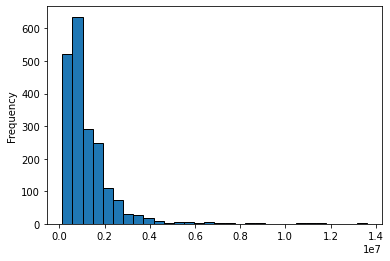

In [ ]:
dados_df['preco'].plot.hist(bins = 30, edgecolor = 'black')

- Distribuição de imóveis por bairros:


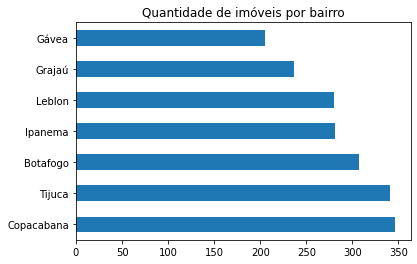

In [ ]:
dados_df['bairro'].value_counts().plot.barh(title = 'Quantidade de imóveis por bairro')

- Visualizando a distribuição dos valores de preço de imóvel de acordo com o bairro analisado:

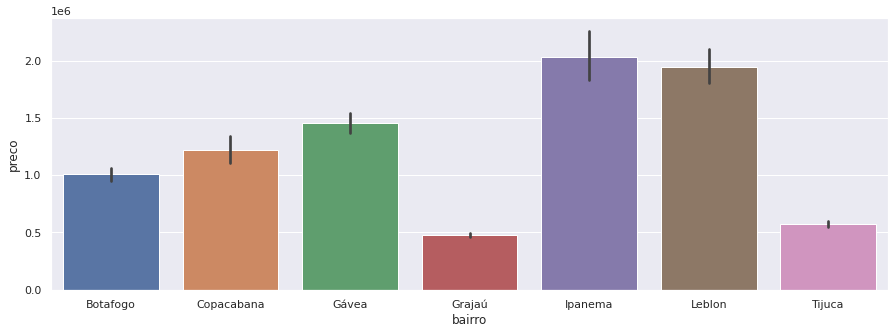

In [ ]:
sns.set(rc = {'figure.figsize': (15, 5)})
graf = sns.barplot(x = 'bairro', y = 'preco', data = dados_df)

- Visualizando a distribuição dos valores de preço de metro quadrado de acordo com o bairro analisado:

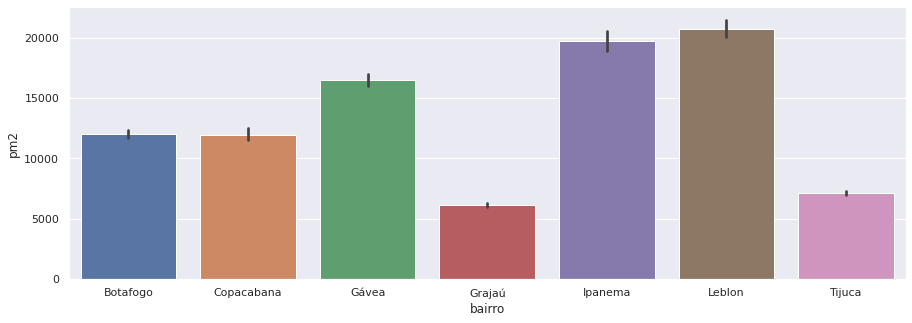

In [ ]:
sns.set(rc = {'figure.figsize': (15, 5)})
graf = sns.barplot(x = 'bairro', y = 'pm2', data = dados_df)

É possível notar que os bairros com maiores valores de imóveis são Ipanema e Leblon. Contudo, ainda que Ipanema tenha o imóvel de maior avaliação, é no Leblon que fica com o maior valor de metro quadrado.

- Dispersão dos preços de imóveis de acordo com a área

É possível notar que existe uma relação entre os preços de imóveis com o aumento da área.

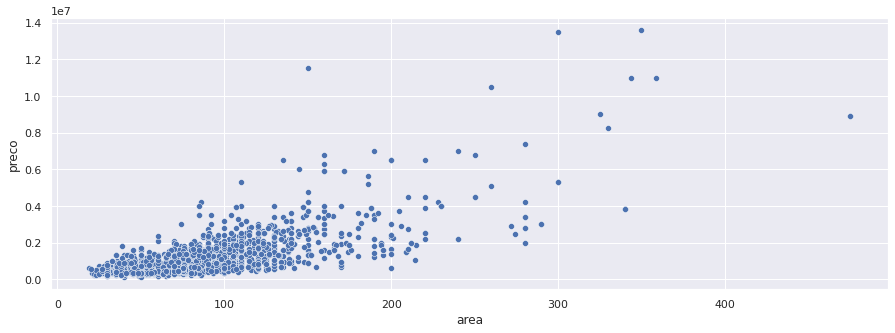

In [ ]:
sns.set(rc = {'figure.figsize': (15, 5)})
graf = sns.scatterplot(data = dados_df, x = 'area', y = 'preco')

- Dispersão de valores de imóveis por condomínio

Também é possível notar uma relação positiva entre os valores de imóveis com custo de condomínio

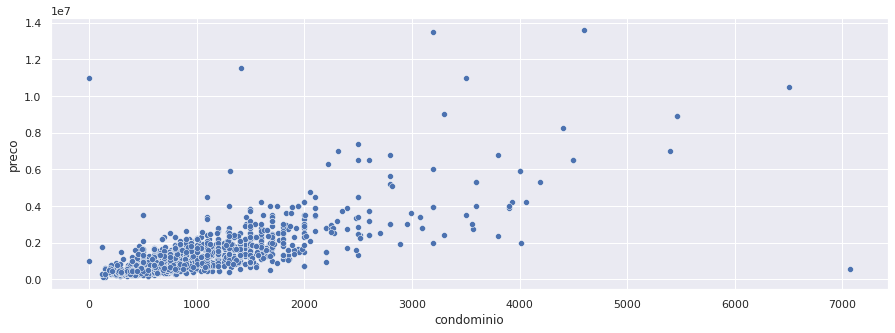

In [ ]:
sns.set(rc = {'figure.figsize': (15, 5)})
graf = sns.scatterplot(data = dados_df, x = 'condominio', y = 'preco')

- Dispersão de valores de condomínio em relação à área

Também é possível notar um acréscimo no custo do condomínio de acordo com a área dos imóveis

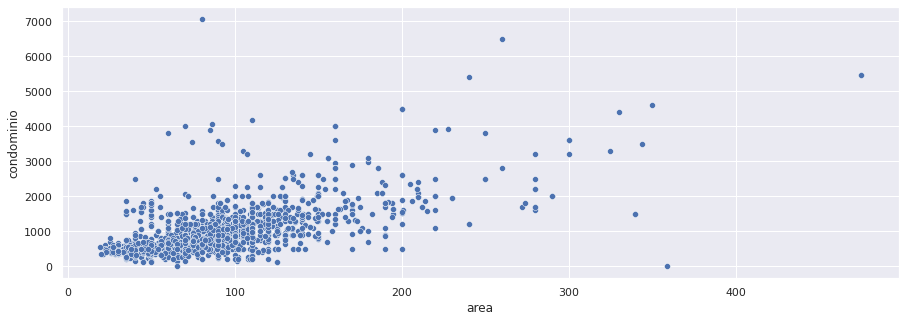

In [ ]:
sns.set(rc = {'figure.figsize': (15, 5)})
graf = sns.scatterplot(data = dados_df, x = 'area', y = 'condominio')

- Visualizando a distribuição de quantidade de quartos na base de dados

Assim é possível verificar que a maior quantidade de imóveis analisados possuía 3 dormitórios

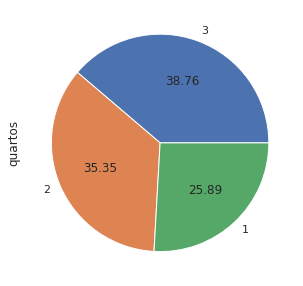

In [ ]:
dados_df['quartos'].value_counts().plot.pie(autopct ='%.2f')
plt.show()

Para verificar se a informação está correta:

In [ ]:
dados_df['quartos'].value_counts()

3    774
2    706
1    517
Name: quartos, dtype: int64